In [23]:
import cv2, sys, os, math
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm

import pandas as pd

from skimage.feature import hog
from sklearn.svm import SVC

import random 
from sklearn.model_selection import train_test_split



In [36]:
path = Path('/project/data/out/NIMH-CHEFS')

imagePaths = list(path.rglob('*.jpg'))
imagePaths_str = [str(path) for path in imagePaths]

imagePaths
#imagePaths_str

[PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F32FS_8041.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F30FS_8546.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F23FS_7205.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/M19FS_9117.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F37FS_9007.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F6FS_3906.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F18FS_6229.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F12FS_5036.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/M7FS_5530.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F21FS_6587.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F19FS_6344.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F31FS_7861.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct/F8FS_4155.jpg'),
 PosixPath('/project/data/out/NIMH-CHEFS/Afraid_direct

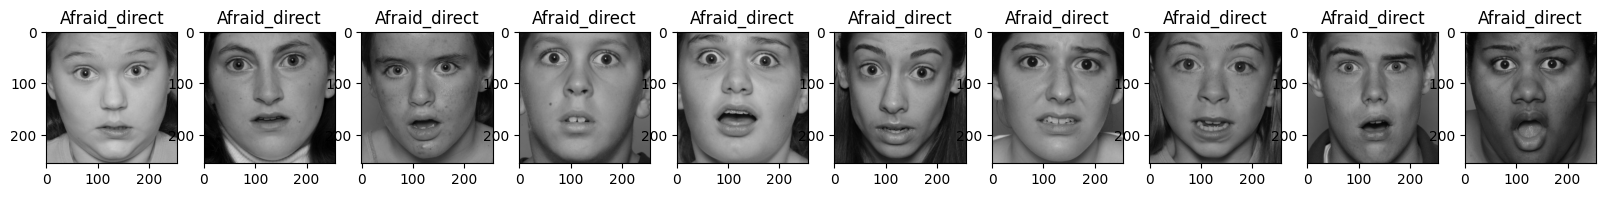

In [26]:

fig = plt.figure(figsize=(20,20))

for i in range(10):

    fig.add_subplot(1, 10, i + 1)
    plt.imshow(np.array(cv2.imread(str(imagePaths[i]))), cmap='gray')
    label = Path(imagePaths[i]).parent.name
    plt.title(label)

plt.show()

In [27]:
def colortogray(im):
    img = cv2.imread(im)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return imgray

def resizeImage(img, size):
    return cv2.resize(img, (size,size))                 

In [34]:
def featuresHog(imagePaths):

    features = []
    labels = []

    for imagePath in tqdm(imagePaths):
        im = colortogray(imagePath)
        im = resizeImage(im, 256)
        
        fd1 = hog(im, orientations=7, pixels_per_cell=(8, 8),
                  cells_per_block=(4, 4),
                  block_norm= 'L2-Hys' ,
                  transform_sqrt = False)

        label = Path(imagePaths[i]).parent.name
        print(label)
        labels.append(label)
        features.append(fd1)

    features = np.array(features)
    labels = np.array(labels)
    return features,labels
  

In [35]:
features, labels = featuresHog(imagePaths_str)


print("[INFO] The number of features ..." + str(features.shape[1]))

print("[INFO] The number of samples ..." + str(labels.shape[0]))


  1%| | 7/533 [00:00<00:17, 30.3

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


  2%| | 11/533 [00:00<00:17, 30.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


  3%| | 18/533 [00:00<00:17, 28.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


  5%| | 26/533 [00:00<00:16, 31.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


  6%| | 34/533 [00:01<00:15, 32.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


  8%| | 42/533 [00:01<00:14, 32.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


  9%| | 50/533 [00:01<00:14, 34.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 11%| | 58/533 [00:01<00:13, 34.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 12%| | 66/533 [00:02<00:12, 36.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 14%|▏| 74/533 [00:02<00:12, 35.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 15%|▏| 82/533 [00:02<00:12, 35.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 17%|▏| 90/533 [00:02<00:12, 35.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 18%|▏| 98/533 [00:02<00:11, 36.

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 20%|▏| 106/533 [00:03<00:11, 37

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 21%|▏| 114/533 [00:03<00:11, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 23%|▏| 122/533 [00:03<00:11, 35

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 24%|▏| 130/533 [00:03<00:11, 33

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 25%|▎| 134/533 [00:03<00:11, 33

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 27%|▎| 142/533 [00:04<00:11, 34

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 28%|▎| 150/533 [00:04<00:10, 35

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 30%|▎| 158/533 [00:04<00:10, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 31%|▎| 166/533 [00:04<00:10, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 33%|▎| 174/533 [00:05<00:09, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 34%|▎| 182/533 [00:05<00:09, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 36%|▎| 190/533 [00:05<00:09, 37

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 37%|▎| 198/533 [00:05<00:09, 35

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 39%|▍| 206/533 [00:05<00:09, 34

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 40%|▍| 214/533 [00:06<00:08, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 42%|▍| 222/533 [00:06<00:08, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 43%|▍| 230/533 [00:06<00:08, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 45%|▍| 238/533 [00:06<00:08, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 46%|▍| 246/533 [00:06<00:07, 37

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 48%|▍| 254/533 [00:07<00:07, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 49%|▍| 262/533 [00:07<00:07, 37

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 51%|▌| 270/533 [00:07<00:07, 37

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 52%|▌| 278/533 [00:07<00:07, 35

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 54%|▌| 286/533 [00:08<00:06, 35

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 55%|▌| 294/533 [00:08<00:06, 35

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 57%|▌| 302/533 [00:08<00:06, 35

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 58%|▌| 310/533 [00:08<00:06, 36

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


 60%|▌| 319/533 [00:09<00:06, 35

Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct
Afraid_direct


KeyboardInterrupt: 

In [33]:
labels

el = set(labels)

el


{'Afraid_direct'}

In [30]:
svm_clf = SVC(kernel='rbf', gamma='scale', C= 10)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = classification_report(y_train, pred)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = classification_report(y_test, pred)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

################################################################################
################################################################################

R =random.randint(1,88)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.3,random_state=R)

print("[INFO] The number of images used in training ..." + str(X_train.shape[0]))
print("[INFO] The number of images used in testing ..." + str(X_test.shape[0]))


svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

[INFO] The number of images used in training ...373
[INFO] The number of images used in testing ...160


ValueError: The number of classes has to be greater than one; got 1 class